# **IMPORTING IMPORTANT LIBRARIES**

## 1.) Pandas [ For DataFrame Creation ]
## 2.) Matplotlib [ For Visualization ]
## 3.) Tensorflow [ For Building Models ]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Utils Library is not an inbuilt library of Google Co-Lab, Hence needs to be installed
!pip install utils 
from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

#To Ensure that the plots aren't creating new windows
%matplotlib inline 

# **IMPORTING THE DATASET USING PANDAS** 

### NOTE: The dataset is manually loaded into the Google Co-Lab. Hence, kindly upload the dataset into the files section first before proceeding ahead.   

In [2]:
column_names = ["Year of sale", "Age of House", "Distance from city center", "Number of Stores in Locality", "Latitude", "Longitude", "Price"]
df = pd.read_csv('house_price_data.csv', names = column_names) 

# The Dataset is Huge and so Its advisable to display the first 5 rows to check if it properly imported. 
df.head()

,Year of sale,Age of House,Distance from city center,Number of Stores in Locality,Latitude,Longitude,Price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157



# **MISSING DATA ANALYSIS**

In [3]:
df.isna().sum()

Year of sale                    0
Age of House                    0
Distance from city center       0
Number of Stores in Locality    0
Latitude                        0
Longitude                       0
Price                           0
dtype: int64

## NOTE: It is observed that the Dataset has no missing values.

# **DATA NORMALIZATION**

## While using optimization algorithms, it is always appropriate to find minimas by normalizing the data before training a model.

In [4]:
# Note: The "Year of Sale" Column is been excluded from the database due to the
#       finding that it actually does affect house prices.
df = df.iloc[:,1:] 
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,Age of House,Distance from city center,Number of Stores in Locality,Latitude,Longitude,Price
0,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


## **FUNCTION FOR CONVERTING LABEL VALUES BACK TO ORIGINAL DISTRIBUTION**

### We are using normalized values for the labels, so we will get the predictions back from a trained model in the same distribution. So, we need to convert the predicted values back to the original distribution if we want predicted prices.

In [5]:
output_variable_mean = df['Price'].mean()
output_variable_std = df['Price'].std()

def convert_label_value(prediction):
    return int(prediction * output_variable_std + output_variable_mean)

# **SEPERATING INPUT AND OUTPUT DATA** 

In [6]:
input_parameters = df_norm.iloc[:, :5]
input_parameters.head()

,Age of House,Distance from city center,Number of Stores in Locality,Latitude,Longitude
0,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.534444,0.006938,0.981581,-1.255981,-0.945141


In [7]:
output_variable = df_norm.iloc[:, -1:]
output_variable.head()

,Price
0,0.350088
1,-1.836486
2,-0.339584
3,-1.839425
4,0.245266


## **EXTRACTION OF PARAMETER AND LABEL VALUES**

### NOTE: TensorFlow Models Require numeric values as input so we need to ensure that before training and testing.

In [8]:
input_parameters_arr = input_parameters.values
output_variable_arr = output_variable.values

print('Shape of Input Parameters : ', input_parameters_arr.shape)
print('Shape of Output Variables : ', output_variable_arr.shape)

Shape of Input Parameters :  (5000, 5)
Shape of Output Variables :  (5000, 1)


## **SPLITING DATA FOR TRAINING AND TESTING**


In [9]:
input_parameters_train, input_parameters_test, output_variable_train, output_variable_test = train_test_split(input_parameters_arr, output_variable_arr, test_size = 0.15)

print('input_parameters_train shape: ', input_parameters_train.shape)
print('output_variable_train shape: ', output_variable_train.shape)
print('input_parameters_test shape: ', input_parameters_test.shape)
print('output_variable_test shape: ', output_variable_test.shape)

input_parameters_train shape:  (4250, 5)
output_variable_train shape:  (4250, 1)
input_parameters_test shape:  (750, 5)
output_variable_test shape:  (750, 1)


# **DEFINIING THE MODEL**

In [10]:
def use_model():
    
    tf_model = Sequential([
        Dense(10, input_shape = (5,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(10, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])

    tf_model.compile(
        loss='mse',
        optimizer='adadelta'
    )
    
    return tf_model

tf_model = use_model()
tf_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 816
Trainable params: 816
Non-trainable params: 0
__________________________________________________________

# **TRAINING THE MODEL** 

### NOTE: **`EarlyStopping`** callback from Keras is used stop the model training if the validation loss stops decreasing for few epochs.

In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 5)

tf_model = use_model()

preds_on_untrained = tf_model.predict(input_parameters_test)

history = tf_model.fit(
    input_parameters_train, output_variable_train,
    validation_data = (input_parameters_test, output_variable_test),
    epochs = 3000,
    callbacks = [early_stopping]
)

Streaming output truncated to the last 5000 lines.
133/133 [==============================] - 0s 1ms/step - loss: 0.5844 - val_loss: 0.6384
Epoch 502/3000
133/133 [==============================] - 0s 1ms/step - loss: 0.5833 - val_loss: 0.6372
Epoch 503/3000
133/133 [==============================] - 0s 1ms/step - loss: 0.5822 - val_loss: 0.6359
Epoch 504/3000
133/133 [==============================] - 0s 1ms/step - loss: 0.5811 - val_loss: 0.6347
Epoch 505/3000
133/133 [==============================] - 0s 1ms/step - loss: 0.5799 - val_loss: 0.6335
Epoch 506/3000
133/133 [==============================] - 0s 1ms/step - loss: 0.5788 - val_loss: 0.6322
Epoch 507/3000
133/133 [==============================] - 0s 1ms/step - loss: 0.5777 - val_loss: 0.6310
Epoch 508/3000
133/133 [==============================] - 0s 1ms/step - loss: 0.5766 - val_loss: 0.6298
Epoch 509/3000
133/133 [==============================] - 0s 1ms/step - loss: 0.5755 - val_loss: 0.6285
Epoch 510/3000
133/133 [====

## **PLOTTING TRAINING AND VALIDATION LOSSES**



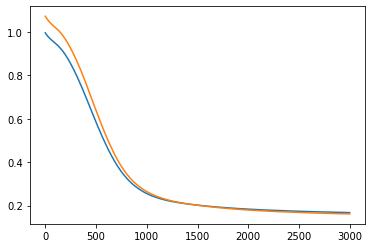

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# **MODEL PREDICTIONS**

In [16]:
preds_on_trained = tf_model.predict(input_parameters_test)
original_distribution_trained_predictions = convert_label_value(preds_on_trained[2])
print(original_distribution_trained_predictions)

13250


## **PLOTTING PREDICTIONS**

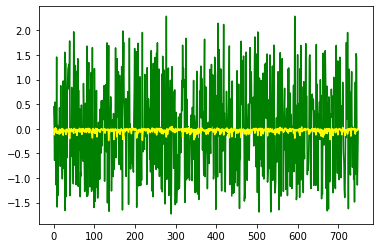

In [15]:
plt.plot(preds_on_trained, color = "green")
plt.plot(preds_on_untrained, color = "yellow")